In [3]:
import csv
import pandas as pd
import googlemaps
import requests
import urllib.request
import time
from bs4 import BeautifulSoup


In [10]:
url = 'http://www.justice.gov/eoir/eoir-immigration-court-listing'
response = requests.get(url)
response

<Response [200]>

In [ ]:
# once we have a list of judges we can look them up on rate my judge 
# https://www.ratemyimmigrationjudge.com/listing/hon-john-w-cortes-immigration-judge-new-york-varick-immigration-court/

In [11]:
soup = BeautifulSoup(response.text,'html.parser')

In [12]:
CIJ = soup.findAll('a')[53:93]
for judge in CIJ:
    print(judge.text)

Tracy Short
Daniel H. Weiss 
Mary Cheng
Sheila McNulty
E. Mark Barcus
Jefferson B. Brown
David Cheng
Grady A. Crooks
Daniel J. Daugherty
Eric L. Dillow
John R. Doolittle II
Irene C. Feldman
Melissa Joy Garcia
Colleen M. Glaser-Allen
Renae M. Hansell
Megan B. Herndon
Jonathan W. Hitesman
Theresa Holmes-Simmons 
Amy C. Hoogasian
Megan R. Jackler
Matthew W. Kaufman
Daniel P. Kinnicutt
Charles P. Koutras
Joy Lampley-Fortson
Scott D. Laurent 
Anna C. Little
Lisa Luis
Daren K. Margolin
H. Kevin Mart 
James F. McCarthy III
Jeffrey S. Miller 
Alfredia Owens 
Anne Kristina Perry 
Rodin Rooyani
Theresa M. Scala 
Christopher R. Seppanen 
Vance H. Spath
Elisa M. Sukkar 
Khalilah M. Taylor 
Ubaid ul-Haq


In [13]:
# soup.findAll('a')[128:193]

In [14]:
ct_info = [addy.text.strip() for addy in soup.findAll('td')[1:415]]

In [15]:
import pandas as pd
import numpy as np
names = ['Court','Address','Judges','Immigration Judges', 'Court Administrator']
columns = ['Court','Address','Judges','Ct Admin']
result = list(filter(lambda x: x not in names,ct_info))
print(result[4:8])

['Florence', '3260 N. Pinal Parkway Avenue\n\t\t\tFlorence, AZ 85132\n\t\t\t520-868-3341', 'Frazer, Molly S.\n\t\t\tGuerrero, Marni\n\t\t\tTaylor, Bruce A.', 'Toliusis, Rachel']


In [16]:
print(len(result))
num_courts = len(result)//4
add_list=[]
for i in range(num_courts):
    to_add = np.array([result[i*4],result[i*4+1],result[i*4+2],result[i*4+3]])
    add_list.append(to_add)
   

285


In [17]:
df2 = pd.DataFrame(np.array(add_list),columns=columns)
df2.tail()

Court  \
66                  Arlington   
67           Falls Church IAC   
68                              
69  English-Figueroa, Yolanda   
70   Neifert, Joseph (Acting)   

                                              Address  \
66  1901 South Bell Street, Suite 200\n\t\t\tArlin...   
67  5107 Leesburg Pike\n\t\t\tFalls Church, VA 220...   
68                                       Richmond IAC   
69                                            Seattle   
70                                             Tacoma   

                                               Judges  \
66  Barnes, John Cody\n\t\t\tBryant, John M.\n\t\t...   
67  De Cardona, Lisa\n\t\t\tFarrar-Crockett, Emily...   
68  10 S. 6th Street\n\t\t\tRichmond, VA 23219\n\t...   
69  915 2nd Ave., Suite 613\n\t\t\tSeattle, WA 981...   
70  1623 East J Street, Suite 3\n\t\t\tTacoma, WA ...   

                                             Ct Admin  
66                                       Cortes, Juan  
67                                    Meyers, Natalie  
68  Kaplan, Elliot M.\n\t\t\tNapier, Wade T.\n\t\t...  
69  Evans, David W.\n\t\t\tJohnson, Shane E.\n\t\t...  
70  Fitting, Tammy\n\t\t\tFloyd, Charles Neil\n\t\...

In [18]:
df2.iloc[68][0] = df2.iloc[68][1]
df2.iloc[68][1] = df2.iloc[68][2]
df2.iloc[68][2] = df2.iloc[68][3]
df2.iloc[68][3] = df2.iloc[69][0]

df2.iloc[69][0] = df2.iloc[69][1]
df2.iloc[69][1] = df2.iloc[69][2]
df2.iloc[69][2] = df2.iloc[69][3]
df2.iloc[69][3] = df2.iloc[70][0]

df2.iloc[70][0] = df2.iloc[70][1]
df2.iloc[70][1] = df2.iloc[70][2]
df2.iloc[70][2] = df2.iloc[70][3]
df2.iloc[70][3] = df2.iloc[69][3]



In [19]:
df2.Address[29]

'JFK Federal Building\n\t\t\t15 New Sudbury Street\n\t\t\tRoom 320\n\t\t\tBoston, MA 02203\n\t\t\t617-565-3080'

In [20]:

df2 = df2.replace(r'\t',' ', regex=True)

df2.loc[29]

Court                                                  Boston
Address     JFK Federal Building\n   15 New Sudbury Street...
Judges      Feder, Robin\n   Furlong Jr., John M.\n   Gagn...
Ct Admin                                 Roder, Bill (Acting)
Name: 29, dtype: object

In [21]:
new = df2['Address'].str.split('\n', n = 5, expand = True)

df2['Street']= new[0]
df2['CityZip']= new[1]
df2['Phone']= new[2]
    

In [22]:
new[25:30]

0                               1  \
25              830 Pine Hill Road                   P.O. Box 2179   
26                 One Canal Place     365 Canal Street, Suite 500   
27            1900 E. Whatley Road               Oakdale, LA 71463   
28  George Fallon Federal Building       31 Hopkins Plaza, Rm. 440   
29            JFK Federal Building           15 New Sudbury Street   

                           2                    3                4     5  
25           Jena, LA, 71342       (318) 335-6880             None  None  
26     New Orleans, LA 70130         504-589-3992             None  None  
27              318-335-0365                 None             None  None  
28       Baltimore, MD 21201         410-962-3092             None  None  
29                  Room 320     Boston, MA 02203     617-565-3080  None

In [23]:
df2 = df2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [24]:
for i in range(len(df2['Street'])):
    try:
        int(df2['Street'][i][0])
    except:
        df2['Street'][i] = new[1][i]
        df2['CityZip'][i]= new[2][i]
        df2['Phone'][i]= new[3][i]

    try:
        int(df2['CityZip'][i][-6:])
    except:
        df2['CityZip'][i]= new[2][i]
        df2['Phone'][i]= new[3][i]


In [25]:
df2.loc[25:30]

Court                                            Address  \
25      LaSalle  830 Pine Hill Road\n   P.O. Box 2179\n   Jena,...   
26  New Orleans  One Canal Place\n   365 Canal Street, Suite 50...   
27      Oakdale  1900 E. Whatley Road\n   Oakdale, LA 71463\n  ...   
28    Baltimore  George Fallon Federal Building\n   31 Hopkins ...   
29       Boston  JFK Federal Building\n   15 New Sudbury Street...   
30      Detroit  P.V. McNamara Federal Building\n   477 Michiga...   

                                               Judges  \
25  Fuller, Steven B.\n   Landis, Brent H.\n   Mun...   
26  La Rocca, Joseph B.\n   Marquez, Charlotte S.\...   
27  Ashworth, Sherron\n   Duck Jr., John A.\n   La...   
28  Crosland, David W.\n   Jones, David M.\n   Kes...   
29  Feder, Robin\n   Furlong Jr., John M.\n   Gagn...   
30  Gorland, Jennifer M.\n   Jebson, Mark J.\n   P...   

                     Ct Admin                             Street  \
25  Russelburg, Mark (Acting)                 830 Pine Hill Road   
26            Miller, Charles        365 Canal Street, Suite 500   
27  Davis, J. Thomas (Acting)               1900 E. Whatley Road   
28               Cook, Brenda          31 Hopkins Plaza, Rm. 440   
29       Roder, Bill (Acting)              15 New Sudbury Street   
30           Shelley, Shandra     477 Michigan Avenue, Suite 440   

                     CityZip                Phone  
25           Jena, LA, 71342       (318) 335-6880  
26     New Orleans, LA 70130         504-589-3992  
27         Oakdale, LA 71463         318-335-0365  
28       Baltimore, MD 21201         410-962-3092  
29                  Room 320     Boston, MA 02203  
30         Detroit, MI 48226         313-226-2603

In [26]:
# selecting rows based on condition 
filtCZ = df2['CityZip'].str.split()
# filtCZ[29][0]
df2['cz_fix'] = filtCZ
df2.loc[32:37]

Court                                            Address  \
32  Kansas City  2345 Grand Boulevard, Suite 525\n   Kansas Cit...   
33        Omaha  1717 Avenue H, Suite 100\n   Omaha, NE 68110\n...   
34    Las Vegas  110 North City Parkway, Suite 400\n   Las Vega...   
35    Elizabeth  625 Evans Street\n   Room 148A\n   Elizabeth, ...   
36       Newark  970 Broad Street, Room 1200\n   Newark, NJ 071...   
37        Otero  26 McGregor Range Rd., Door #1\n   Chaparral, ...   

                                               Judges            Ct Admin  \
32  Howard, Justin W.\n   Johnson, Colin P.\n   Sa...     Jones, Betty A.   
33  Larsen, Alexandra\n   Meyer, Abby L.\n   Morri...  Atkinson, Henry D.   
34  Baker, Glen R.\n   McDermott, Ann M.\n   Nguye...       Arter, Rachel   
35  Pope, Jason L.\n   Shirole, Pallavi S.\n   Tad...         Soto, Adaly   
36  Chen, Shana W.\n   Cheng, David\n   Finston, L...      Friedman, Paul   
37  Fernandez, Lorely Ramirez\n   French, Kathy\n ...      Juarez, Luz E.   

                               Street                 CityZip  \
32    2345 Grand Boulevard, Suite 525   Kansas City, MO 64108   
33           1717 Avenue H, Suite 100         Omaha, NE 68110   
34  110 North City Parkway, Suite 400     Las Vegas, NV 89106   
35                   625 Evans Street     Elizabeth, NJ 07201   
36        970 Broad Street, Room 1200        Newark, NJ 07102   
37     26 McGregor Range Rd., Door #1     Chaparral, NM 88081   

              Phone                      cz_fix  
32     816-581-5000  [Kansas, City,, MO, 64108]  
33     402-348-0310         [Omaha,, NE, 68110]  
34     702-458-0227    [Las, Vegas,, NV, 89106]  
35     908-787-1355     [Elizabeth,, NJ, 07201]  
36     973-645-3524        [Newark,, NJ, 07102]  
37     575-824-8900     [Chaparral,, NM, 88081]

In [27]:
for i in range(len(df2['CityZip'])):
    try:
        int(df2['cz_fix'][i][-1])
        if int(df2['cz_fix'][i][-1])<1000:
            df2['CityZip'][i]= new[3][i]
            df2['Phone'][i]= new[4][i]
    except:
        pass

In [28]:
df2.loc[32:37]

Court                                            Address  \
32  Kansas City  2345 Grand Boulevard, Suite 525\n   Kansas Cit...   
33        Omaha  1717 Avenue H, Suite 100\n   Omaha, NE 68110\n...   
34    Las Vegas  110 North City Parkway, Suite 400\n   Las Vega...   
35    Elizabeth  625 Evans Street\n   Room 148A\n   Elizabeth, ...   
36       Newark  970 Broad Street, Room 1200\n   Newark, NJ 071...   
37        Otero  26 McGregor Range Rd., Door #1\n   Chaparral, ...   

                                               Judges            Ct Admin  \
32  Howard, Justin W.\n   Johnson, Colin P.\n   Sa...     Jones, Betty A.   
33  Larsen, Alexandra\n   Meyer, Abby L.\n   Morri...  Atkinson, Henry D.   
34  Baker, Glen R.\n   McDermott, Ann M.\n   Nguye...       Arter, Rachel   
35  Pope, Jason L.\n   Shirole, Pallavi S.\n   Tad...         Soto, Adaly   
36  Chen, Shana W.\n   Cheng, David\n   Finston, L...      Friedman, Paul   
37  Fernandez, Lorely Ramirez\n   French, Kathy\n ...      Juarez, Luz E.   

                               Street                 CityZip  \
32    2345 Grand Boulevard, Suite 525   Kansas City, MO 64108   
33           1717 Avenue H, Suite 100         Omaha, NE 68110   
34  110 North City Parkway, Suite 400     Las Vegas, NV 89106   
35                   625 Evans Street     Elizabeth, NJ 07201   
36        970 Broad Street, Room 1200        Newark, NJ 07102   
37     26 McGregor Range Rd., Door #1     Chaparral, NM 88081   

              Phone                      cz_fix  
32     816-581-5000  [Kansas, City,, MO, 64108]  
33     402-348-0310         [Omaha,, NE, 68110]  
34     702-458-0227    [Las, Vegas,, NV, 89106]  
35     908-787-1355     [Elizabeth,, NJ, 07201]  
36     973-645-3524        [Newark,, NJ, 07102]  
37     575-824-8900     [Chaparral,, NM, 88081]

In [29]:
df2['Judges'] = df2.Judges.apply(lambda x: x.split('\n'))

for p in range(len(df2['Judges'])):
    for i in range(len(df2['Judges'][p])):
        df2['Judges'][p][i] = df2['Judges'][p][i].lstrip()

In [30]:
df2.loc[4]

Court                                                Adelanto
Address     Adelanto Detention Facility\n   10250 Rancho R...
Judges      [DePowell, Bryan E., Halperin, Ravit R., Marcu...
Ct Admin                            Roberts, Valerie (Acting)
Street                           10250 Rancho Road, Ste. 201A
CityZip                                    Adelanto, CA 92301
Phone                                            760-561-6500
cz_fix                                 [Adelanto,, CA, 92301]
Name: 4, dtype: object

In [31]:
df2['CityZip'][10]

'   Sacramento, CA 95814'

In [32]:
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(df2['CityZip'][10]) +'?format=json'
response = requests.get(url).json()
print('Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon'])

Latitude: 38.5810606, Longitude: -121.493895


In [33]:
range(len(df2['CityZip'])-1)

range(0, 70)

In [34]:
lat=[]
lon=[]
for i in range(len(df2['CityZip'])):
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(df2['CityZip'][i]) +'?format=json'
    response = requests.get(url).json()
    # print('Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon'])
     
    lat.append(response[0]['lat'])
    lon.append(response[0]['lon'])
df2.tail()

Court                                            Address  \
66         Arlington  1901 South Bell Street, Suite 200\n   Arlingto...   
67  Falls Church IAC  5107 Leesburg Pike\n   Falls Church, VA 22041\...   
68      Richmond IAC  10 S. 6th Street\n   Richmond, VA 23219\n   80...   
69           Seattle  915 2nd Ave., Suite 613\n   Seattle, WA 98174\...   
70            Tacoma  1623 East J Street, Suite 3\n   Tacoma, WA 984...   

                                               Judges  \
66  [Barnes, John Cody, Bryant, John M., Burman, L...   
67  [De Cardona, Lisa, Farrar-Crockett, Emily N., ...   
68  [Kaplan, Elliot M., Napier, Wade T., Palmer, B...   
69  [Evans, David W., Johnson, Shane E., McSeveney...   
70  [Fitting, Tammy, Floyd, Charles Neil, Odell, J...   

                     Ct Admin                             Street  \
66               Cortes, Juan  1901 South Bell Street, Suite 200   
67            Meyers, Natalie                 5107 Leesburg Pike   
68  English-Figueroa, Yolanda                   10 S. 6th Street   
69   Neifert, Joseph (Acting)            915 2nd Ave., Suite 613   
70   Neifert, Joseph (Acting)        1623 East J Street, Suite 3   

                   CityZip         Phone                       cz_fix  
66     Arlington, VA 22202  703-603-1300      [Arlington,, VA, 22202]  
67  Falls Church, VA 22041  703-756-8002  [Falls, Church,, VA, 22041]  
68      Richmond, VA 23219  804-343-2900       [Richmond,, VA, 23219]  
69       Seattle, WA 98174  206-342-7200        [Seattle,, WA, 98174]  
70        Tacoma, WA 98421  253-779-6020         [Tacoma,, WA, 98421]

In [35]:
len(lon)

71

In [36]:
# for i in range(len(df2['CityZip'])-1):
#     df2['Latitude'][i] = lat[i]
#     df2['Longitude'][i] = lon[i]
df2 = df2.assign(Latitude = pd.Series(lat).values)
df2 = df2.assign(Longitude = pd.Series(lon).values)
df2.head()


Court                                            Address  \
0      Eloy  1705 E. Hanna Road, Suite 366\n   Eloy, AZ 851...   
1  Florence  3260 N. Pinal Parkway Avenue\n   Florence, AZ ...   
2   Phoenix  250 N. Seventh Ave., Suite 300\n   Phoenix, AZ...   
3    Tucson  300 West Congress, Suite 300\n   Tucson, AZ 85...   
4  Adelanto  Adelanto Detention Facility\n   10250 Rancho R...   

                                              Judges  \
0  [Cortes, John W., Gaz, Jennifer I., Habich, Pa...   
1  [Frazer, Molly S., Guerrero, Marni, Taylor, Br...   
2  [Bartlemay Sr., Robert C., Cottor, Elizabeth A...   
3  [Davis, John W., DeAngelis, Kathryn L., Keenan...   
4  [DePowell, Bryan E., Halperin, Ravit R., Marcu...   

                    Ct Admin                           Street  \
0          Padilla, Victoria    1705 E. Hanna Road, Suite 366   
1           Toliusis, Rachel     3260 N. Pinal Parkway Avenue   
2              Riebs, Sathya   250 N. Seventh Ave., Suite 300   
3               Graff, Corey     300 West Congress, Suite 300   
4  Roberts, Valerie (Acting)     10250 Rancho Road, Ste. 201A   

                 CityZip            Phone                  cz_fix    Latitude  \
0         Eloy, AZ 85131     520-466-3671      [Eloy,, AZ, 85131]  32.7551703   
1     Florence, AZ 85132     520-868-3341  [Florence,, AZ, 85132]  33.0314508   
2      Phoenix, AZ 85007     602-640-2747   [Phoenix,, AZ, 85007]  33.4484367   
3       Tucson, AZ 85701     520-670-5212    [Tucson,, AZ, 85701]  32.2228765   
4     Adelanto, CA 92301     760-561-6500  [Adelanto,, CA, 92301]  34.5827699   

      Longitude  
0  -111.5534932  
1  -111.3873431  
2  -112.0741417  
3  -110.9748477  
4   -117.409215

In [37]:
df2['Longitude'] = df2['Longitude'].astype(float)
df2['Latitude'] = df2['Latitude'].astype(float)

In [38]:
BBox = ((df2.Longitude.min(), df2.Longitude.max(),df2.Latitude.min(), df2.Latitude.max()))

In [39]:
BBox

(-157.855676, -66.11192237120817, 18.42368055, 47.6038321)

In [40]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

/home/awstclair/miniconda3/envs/geopandas_env/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [41]:
df2['Longitude'] = df2['Longitude'].astype(float)
df2['Latitude'] = df2['Latitude'].astype(float)


In [42]:
geometry = [Point(xy) for xy in zip(df2['Longitude'], df2['Latitude'])]
geometry[:3]

In [43]:

# crs = crs.set_crs('espg:4326')
geo_df = gpd.GeoDataFrame(df2, crs=4326,geometry=geometry)
geo_df= geo_df.drop(['Address'], axis=1)
geo_df.head()

Court                                             Judges  \
0      Eloy  [Cortes, John W., Gaz, Jennifer I., Habich, Pa...   
1  Florence  [Frazer, Molly S., Guerrero, Marni, Taylor, Br...   
2   Phoenix  [Bartlemay Sr., Robert C., Cottor, Elizabeth A...   
3    Tucson  [Davis, John W., DeAngelis, Kathryn L., Keenan...   
4  Adelanto  [DePowell, Bryan E., Halperin, Ravit R., Marcu...   

                    Ct Admin                           Street  \
0          Padilla, Victoria    1705 E. Hanna Road, Suite 366   
1           Toliusis, Rachel     3260 N. Pinal Parkway Avenue   
2              Riebs, Sathya   250 N. Seventh Ave., Suite 300   
3               Graff, Corey     300 West Congress, Suite 300   
4  Roberts, Valerie (Acting)     10250 Rancho Road, Ste. 201A   

                 CityZip            Phone                  cz_fix   Latitude  \
0         Eloy, AZ 85131     520-466-3671      [Eloy,, AZ, 85131]  32.755170   
1     Florence, AZ 85132     520-868-3341  [Florence,, AZ, 85132]  33.031451   
2      Phoenix, AZ 85007     602-640-2747   [Phoenix,, AZ, 85007]  33.448437   
3       Tucson, AZ 85701     520-670-5212    [Tucson,, AZ, 85701]  32.222876   
4     Adelanto, CA 92301     760-561-6500  [Adelanto,, CA, 92301]  34.582770   

    Longitude                     geometry  
0 -111.553493  POINT (-111.55349 32.75517)  
1 -111.387343  POINT (-111.38734 33.03145)  
2 -112.074142  POINT (-112.07414 33.44844)  
3 -110.974848  POINT (-110.97485 32.22288)  
4 -117.409215  POINT (-117.40922 34.58277)

In [44]:
street_map =gpd.read_file('cb_2018_us_nation_5m.shp')

<AxesSubplot:>

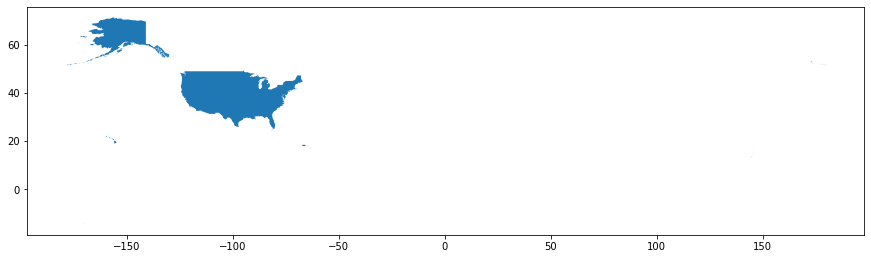

In [45]:

fig,ax= plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

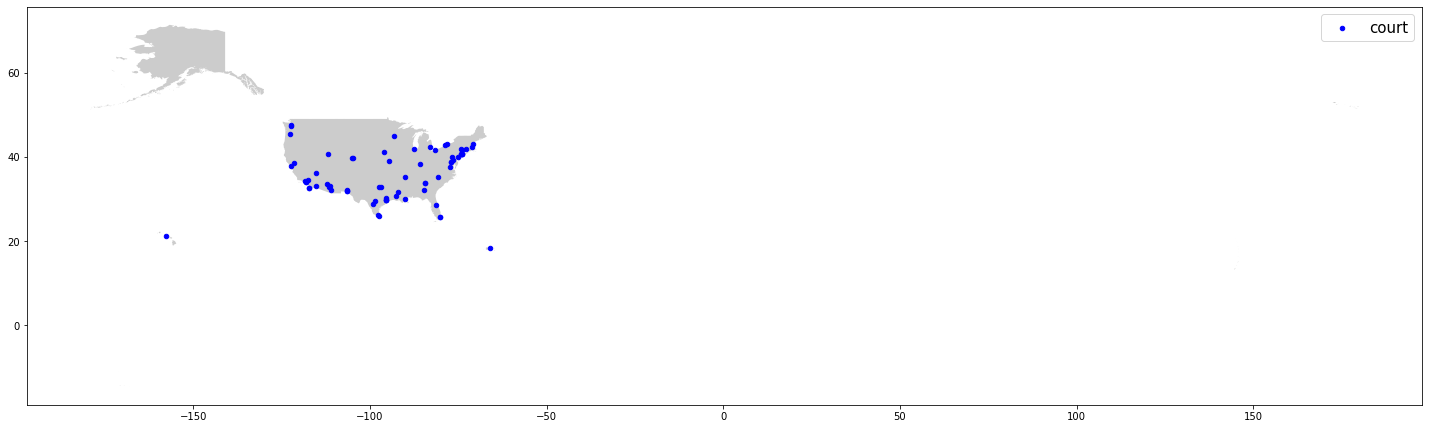

In [47]:


fig,ax = plt.subplots(figsize = (25,15))
street_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_df.plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label= "court")
plt.legend(prop={'size': 15})

In [239]:
geo_df[geo_df['Latitude']< 25]

Court  \
22                 Honolulu   
51  Guaynabo\n   (San Juan)   

                                               Judges                Ct Admin  \
22                [Clemente, Jesus, Wagner, Clarence]  Viray, Glenda (Acting)   
51  [Diaz-Rex, Julia, Espinal, Pedro J., Talavera-...            Quiles, Luis   

                               Street                     CityZip  \
22     300 Ala Moana Blvd., Rm. 8-112          Honolulu, HI 96850   
51       #7 Tabonuco Street, Room 401     Guaynabo, PR 00968-4605   

              Phone                       cz_fix   Latitude   Longitude  \
22     808-541-1870       [Honolulu,, HI, 96850]  21.304547 -157.855676   
51     787-749-4386  [Guaynabo,, PR, 00968-4605]  18.423681  -66.111922   

                       geometry  
22  POINT (-157.85568 21.30455)  
51   POINT (-66.11192 18.42368)

In [240]:
BBox

(-157.855676, -66.11192237120817, 18.42368055, 47.6038321)

In [241]:
ruh_m = plt.imread('map.png')

In [250]:
latgsize=abs((BBox[0] -BBox[1]))
lonsize=abs((BBox[2]-BBox[3]))
print(longsize, latsize)

91.74375362879182 29.180151549999998


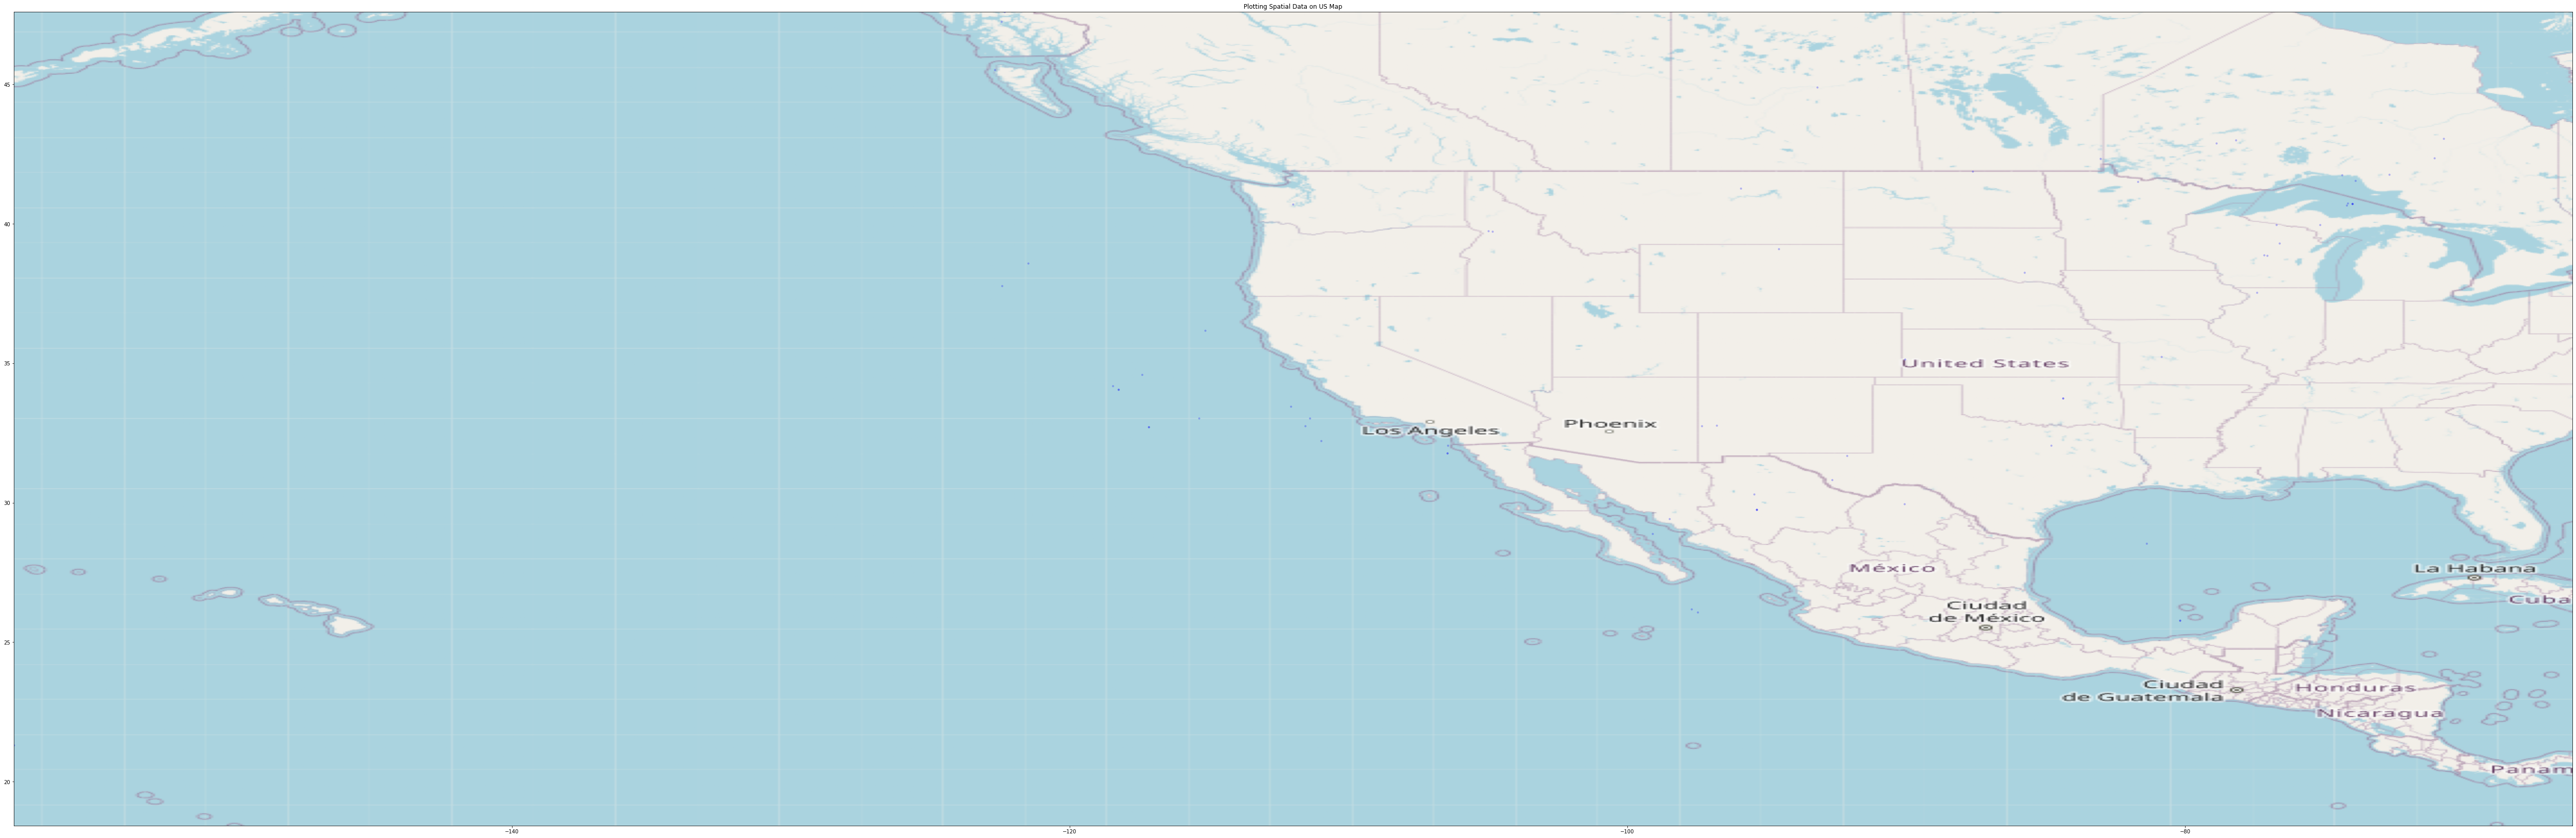

In [251]:
fig, ax = plt.subplots(figsize = (longsize,latsize))
ax.scatter(geo_df.Longitude, geo_df.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on US Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')